# Growing Mask to Segment Entire Bison

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.segmentation import chan_vese
import numpy as np

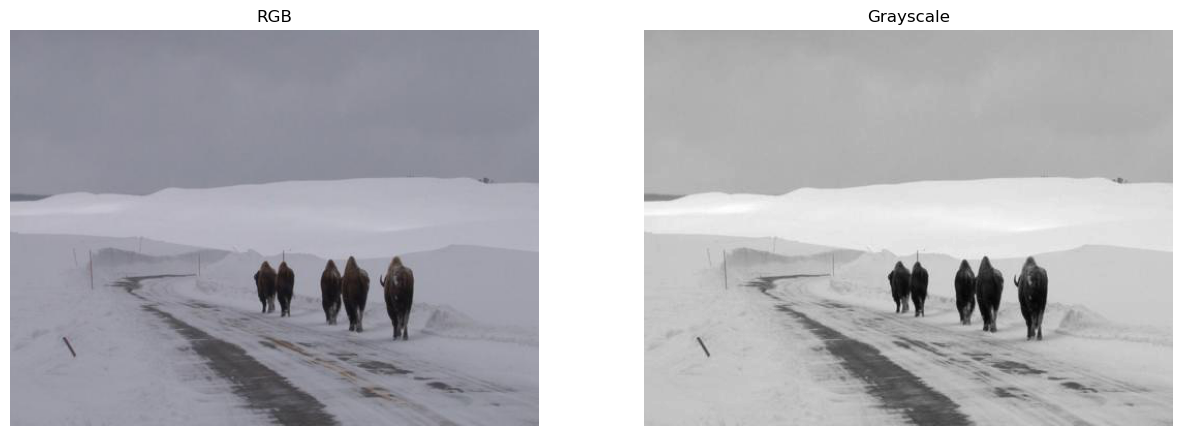

In [2]:
bison = cv2.imread("./images/bison.jpg")
bison = cv2.cvtColor(bison, cv2.COLOR_BGR2RGB)
bison_grayscale = cv2.cvtColor(bison, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(bison, cmap='gray')
axs[0].set_title("RGB")
axs[0].axis('off')
axs[1].imshow(bison_grayscale, cmap='gray')
axs[1].set_title("Grayscale")
axs[1].axis('off')
plt.show()

Apply the [Chan-Vese segmentation algorithm](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.chan_vese) and [remove small objects](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects) (noise).

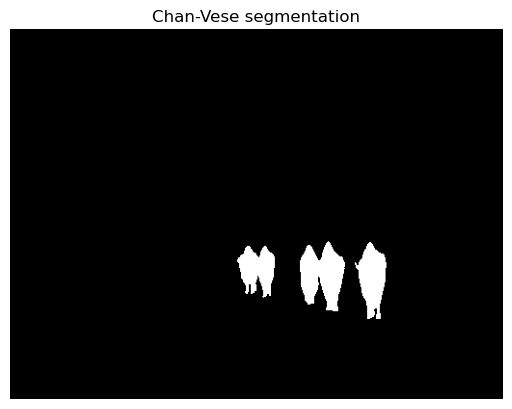

In [3]:
bison_mask = chan_vese(bison_grayscale[210:310, 210:410], mu=0.1)
bison_binary = np.zeros_like(bison_grayscale).astype('bool')
bison_binary[210:310, 210:410] = bison_mask
bison_binary = morphology.remove_small_objects(bison_binary, 100)

plt.imshow(bison_binary, cmap='gray')
plt.title('Chan-Vese segmentation')
plt.axis('off')
plt.show()